## Import module

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Environment initialization

In [2]:
# Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode="ansi").env
state= env.reset()
rendered_env = env.render()
print(rendered_env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




## Helper function

In [3]:
# Selection function
def epsilon_selection(state,epsilon,q_table):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample() # Sample random action (exploration)
    else:      
        action = np.argmax(q_table[state]) # Select best known action (exploitation)
    return action

def plot(cum_rewards, total_epochs):
    plt.figure(figsize=(12, 6)) 

    # Plot 1: Cumulative reward per episode
    plt.subplot(1, 2, 1)
    plt.plot(cum_rewards,label='Learning')
    plt.title("Accumulated Reward Over Episode(Learning)")
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.legend()
    
    # Plot 2: Number of epochs per episode
    plt.subplot(1, 2, 2)
    plt.plot(total_epochs,label='Learning')
    plt.title("Steps Per Episodes(Learning)")
    plt.xlabel("Episodes")
    plt.ylabel("steps")
    plt.legend()
    
    # Adjust layout and display the plot
    plt.tight_layout()  
    plt.show()


## Training the agent

Episode : 3000


===Training completed.===



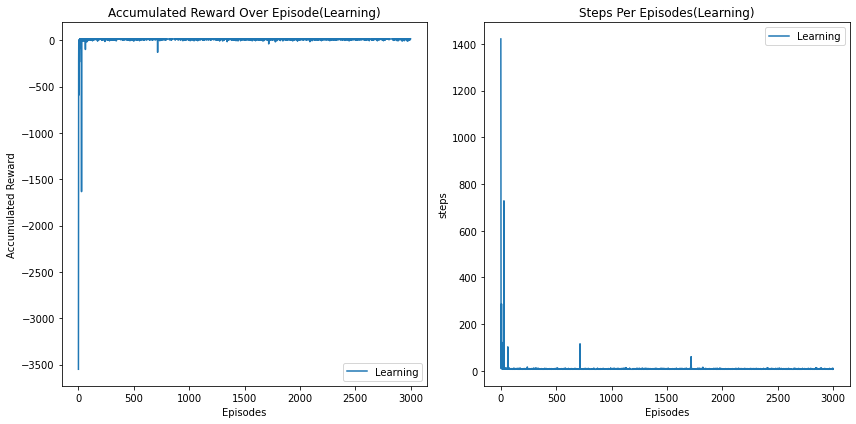

In [14]:

# Q-learning
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.3 # Learning rate
gamma = 0.97  # Discount rate
epsilon = 0.3  # Exploration rate
min_epsilon = 0.1  # Minimum exploration rate
decay_rate = 0.99  # Decay rate for exploration rate
num_episodes = 3000  # Number of episodes

# Output for plots
accum_rewards = np.zeros([num_episodes])
total_steps = np.zeros([num_episodes])

for episode in range(1, num_episodes+1):
    # Reset environment
    state, info = env.reset(seed=10)
    step = 0 
    finish = False
    cum_reward = 0

    while not finish:
        # Action selection
        action = epsilon_selection(state,epsilon,q_table)
        next_state, reward, finish, _ , info = env.step(action) 
        
        # Calculate q-value and update the q-table
        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] +=  alpha * (reward + gamma * next_max - old_q_value)
        
        # count the reward and steps
        state = next_state
        step += 1
        cum_reward += reward
        total_steps[episode-1] = step
        accum_rewards[episode-1] = cum_reward
        
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * decay_rate)
    if episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode : {episode}")

print("\n")
print("===Training completed.===\n")
# plot the picture
plot(accum_rewards,total_steps)

np.save("q_table_q_learning.npy", q_table)

## Performance test for Q-learning

In [18]:
# Test policy performance for Q-learning after training

q_table_q_learning = np.load("q_table_q_learning.npy")
print(q_table_q_learning)
num_steps = 0
num_illegally_dropoffs = 0
num_episodes = 100
max_steps_per_episode = 100
#show the result of one episode
target_episode = 5  

total_reward = 0
for episode in range(num_episodes):
    # Initialize experience buffer
    state,_ = env.reset()
    step = 0 
    num_illegally_dropoffs = 0
    cum_reward = 0
    finish = False

    # limit the max_steps each episode to 100
    for i in range(max_steps_per_episode):
        if finish:
            break
        step += 1
        
        # greedy selection
        action = np.argmax(q_table_q_learning[state])
        state, reward, finish, _, _ = env.step(action)
        cum_reward += reward
        # print steps of a trained agent (taxi) based on Q-learnin algorithm.
        if episode == target_episode:
            print(env.render())
            print(f'Step: {step-1}')
            print(f'State: {state}, Action: {action}, Reward: {reward}, Total Accumalated Reward: {cum_reward}')
            print()
            
        if reward == -10:
            num_illegally_dropoffs += 1

    # total steps and reward
    num_steps += step
    total_reward += cum_reward


# Print final results
print("\n") 
print(f"Test results after {num_episodes} episodes:")
print(f"Average number of steps per episode: {num_steps / num_episodes}")
print(f"Average number of illegally dropoffs per episode: {num_illegally_dropoffs / num_episodes}")
print(f"Average accumulated reward per episode: {total_reward / num_episodes}")

[[ 0.          0.          0.          0.          0.          0.        ]
 [-1.31581478 -1.09816131 -1.22628899 -1.15872132 -1.77432519 -3.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 ...
 [ 4.95495843 13.8822832  -2.29500285  7.90074681  1.11540977 -4.00579478]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 0
State: 284, Action: 0, Reward: -1, Total Accumalated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 1
State: 384, Action: 0, Reward: -1, Total Accumalated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 2
State: 484, Action: 0, Reward: -1, Total Accumalated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : 

## Helper function for sarsa

In [30]:
# Sarsa
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def softmax_action(state, q_table):
    action_probabilities = softmax(q_table[state])
    action = np.random.choice(len(action_probabilities), p=action_probabilities)
    return action

Episode #: 3000


===Training completed.===



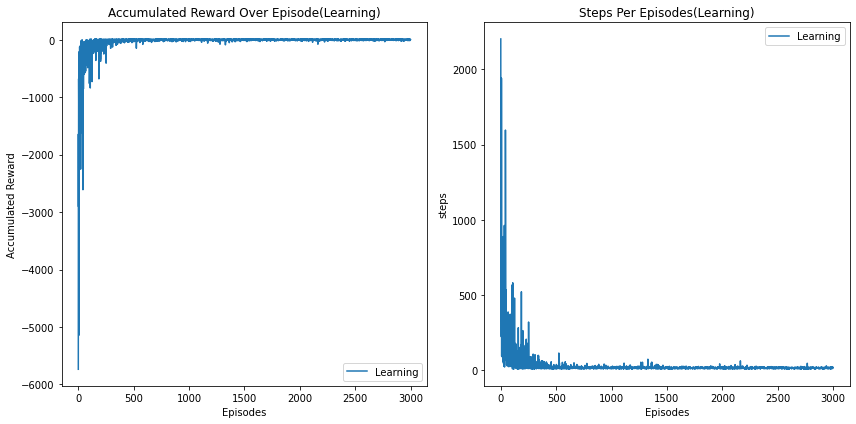

In [40]:
# Test policy performance for Sarsa after training

q_table = np.zeros([env.observation_space.n, env.action_space.n])

alpha = 0.3 # Learning rate
gamma = 0.97  # Discount rate
epsilon = 0.3  # Exploration rate
min_epsilon = 0.1  # Minimum exploration rate
decay_rate = 0.99  # Decay rate for exploration rate
num_episodes = 3000  # Number of episodes

# Output for plots
accum_reward = np.zeros([num_episodes])
total_steps = np.zeros([num_episodes])

for episode in range(1, num_episodes+1):
    # Reset environment
    state, info = env.reset()
    step = 0 
    finish = False
    cum_reward = 0
    # action = softmax_action(state,q_table)
    action = epsilon_selection(state,epsilon,q_table)
    while not finish:
        
    
        # update the q-table
        next_state, reward, finish, _ , info = env.step(action) 
        # next_action = softmax_action(next_state,q_table)
        next_action = epsilon_selection(next_state,epsilon,q_table)
        old_q_value = q_table[state, action]
        q_table[state, action] += alpha * (reward + gamma * q_table[next_state, next_action] - old_q_value)


        # update the state and action, calculate the steps and reward
        state = next_state
        action = next_action
        step += 1
        cum_reward += reward
        total_steps[episode-1] = step
        accum_reward[episode-1] = cum_reward
    
    epsilon = max(min_epsilon, epsilon * decay_rate)
    
    if episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode #: {episode}")

print("\n")
print("===Training completed.===\n")

plot(accum_reward,total_steps)
np.save("q_table_sarsa.npy", q_table)

In [11]:
# Test policy performance for Q-learning after training

q_table_sarsa = np.load("q_table_sarsa.npy")
num_steps = 0
num_illegally_dropoffs = 0
num_episodes = 1000
max_steps_per_episode = 100
#show the result of one episode
target_episode = 5  

total_reward = 0
for episode in range(num_episodes):
    # Initialize experience buffer
    state,_ = env.reset()
    step = 0 
    num_illegally_dropoffs = 0
    cum_reward = 0
    finish = False

    # limit the max_steps each episode to 100
    for i in range(max_steps_per_episode):
        if finish:
            break
        step += 1
        
        # greedy selection
        action = np.argmax(q_table_sarsa[state])
        state, reward, finish, _, _ = env.step(action)
        cum_reward += reward
        # print steps of a trained agent (taxi) based on Q-learnin algorithm.
        if episode == target_episode:
            print(env.render())
            print(f'Step: {step-1}')
            print(f'State: {state}, Action: {action}, Reward: {reward}, Total Accumalated Reward: {cum_reward}')
            print()
            
        if reward == -10:
            num_illegally_dropoffs += 1

    # total steps and reward
    num_steps += step
    total_reward += cum_reward


# Print final results
print("\n") 
print(f"Test results after {num_episodes} episodes:")
print(f"Average number of steps per episode: {num_steps / num_episodes}")
print(f"Average number of illegally dropoffs per episode: {num_illegally_dropoffs / num_episodes}")
print(f"Average accumulated reward per episode: {total_reward / num_episodes}")

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step: 0
State: 74, Action: 2, Reward: -1, Total Accumalated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 1
State: 174, Action: 0, Reward: -1, Total Accumalated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 2
State: 274, Action: 0, Reward: -1, Total Accumalated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 3
State: 374, Action: 0, Reward: -1, Total Accumalated Reward: -4

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 4
State: 474, Action: 0, Reward: -1, Total Accumalated Reward: -5

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step: 5
State: 478, Action: 4, Reward: -1, Total Accumalated Rewar